<a href="https://colab.research.google.com/github/MMA27/KotlinAsFirst2018/blob/master/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
uploaded = files.upload()

Saving HR.csv to HR.csv


Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [3]:
hr = pd.read_csv('HR.csv')
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,"14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00"
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [ ]:
num_hr   = [c for c in hr.columns if hr[c].dtype.name != 'object']


<Axes: >

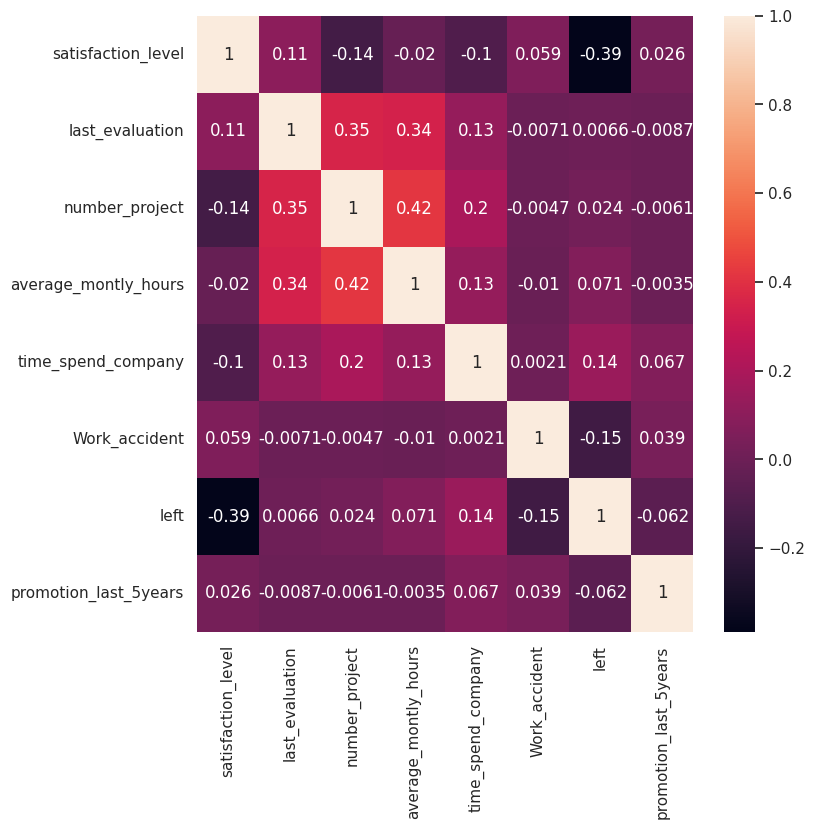

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(hr[num_hr].corr(), annot=True)

'average_montly_hours','number_project' - две наиболее скоррелированные переменные.
'average_montly_hours','promotion_last_5years' - две наименее скоррелированные переменные

In [ ]:
hr.groupby('department').agg({'department':'count'}).rename(columns = {'department':'количество_сотрудников'}).reset_index()

,department,количество_сотрудников
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


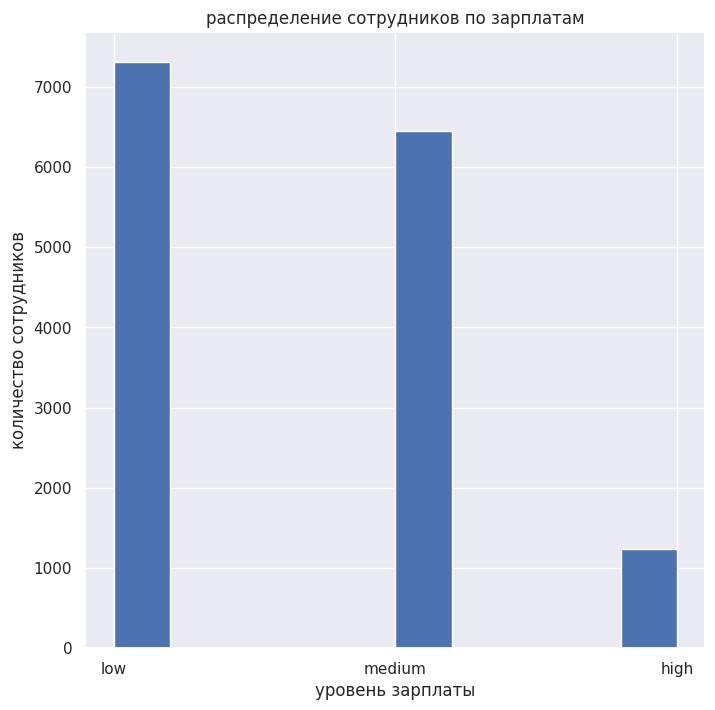

In [ ]:
bhr['salary'].hist()
plt.xlabel('уровень зарплаты')
plt.ylabel('количество сотрудников')
plt.title('распределение сотрудников по зарплатам')
plt.show()

In [ ]:
hr.groupby(['department','salary']).agg({'department':'count'}).rename(columns = {'department':'количество_сотрудников'})

количество_сотрудников
department  salary                        
IT          high                        83
            low                        609
            medium                     535
RandD       high                        51
            low                        364
            medium                     372
accounting  high                        74
            low                        358
            medium                     335
hr          high                        45
            low                        335
            medium                     359
management  high                       225
            low                        180
            medium                     225
marketing   high                        80
            low                        402
            medium                     376
product_mng high                        68
            low                        451
            medium                     383
sales       high                       269
            low                       2099
            medium                    1772
support     high                       141
            low                       1146
            medium                     942
technical   high                       201
            low                       1372
            medium                    1147

In [ ]:
ds = hr.groupby(['department','salary']).agg({'department':'count'}).rename(columns = {'department':'количество_сотрудников'}).reset_index()


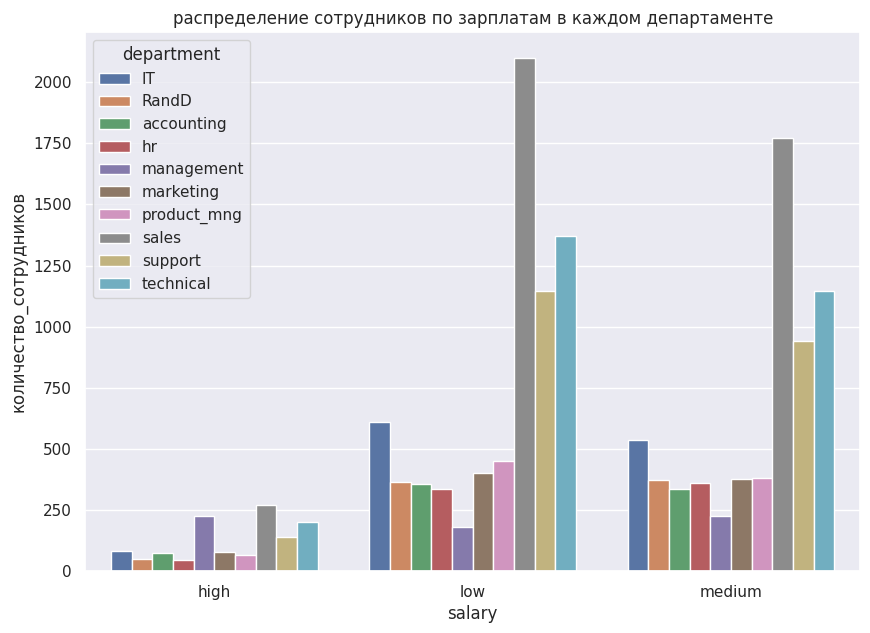

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'salary', y = 'количество_сотрудников', hue = 'department', data = ds)
plt.title('распределение сотрудников по зарплатам')
plt.show()

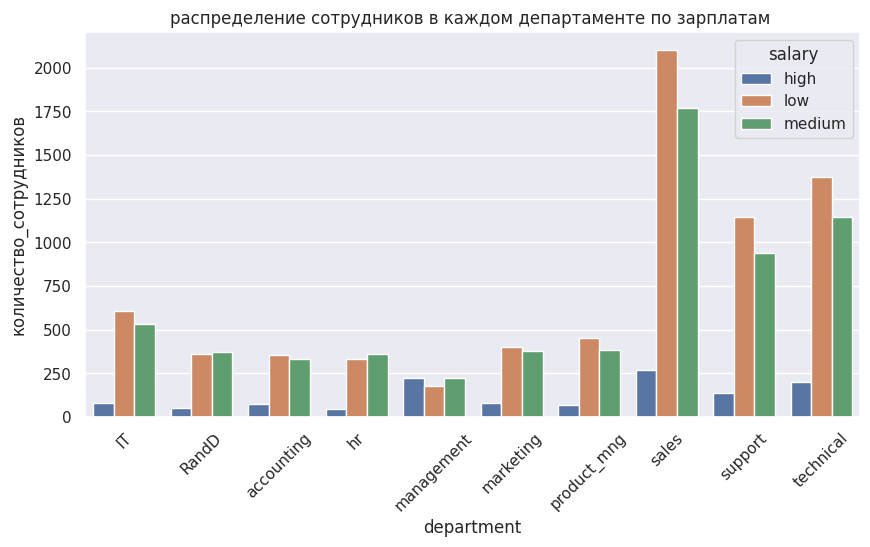

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'department', y = 'количество_сотрудников', hue = 'salary', data = ds)
plt.title('распределение сотрудников в каждом департаменте по зарплатам ')
plt.xticks(rotation=45)
plt.show()

**Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**

In [ ]:
high = hr.loc[hr['salary']=='high']['average_montly_hours'].values
low = hr.loc[hr['salary']=='low']['average_montly_hours'].values

In [ ]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    if p_value_normality <0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")


In [ ]:
check_normality(high)
check_normality(low)

Отклоняем нулевую гипотезу >> Данные распределены не нормально
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
ttest,pvalue = stats.mannwhitneyu(high,low, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Отклоняем нулевую гипотезу")
else:
    print("Не отклоняем нулевую гипотезу")

p-value:0.8241
Не отклоняем нулевую гипотезу


In [ ]:
high.mean()

199.86742118027485

In [ ]:
low.mean()

200.9965828321487

H 0 : среднее время на работе сотрудников с высоким окладом равно среднему времени на работе сотрудников с низким окладом.

Нет оснований считать, что среднее время на работе сотрудников с высоким окладом проводят больше времени на работе , чем сотрудники с низким окладом.

**Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**

● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [13]:
hr['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [27]:
left_count = hr[hr['left']==1]['left'].count()


3571

In [33]:
left = hr.query('left==1')
lg = left.groupby('left').agg({'promotion_last_5years':'sum','satisfaction_level': 'mean', 'number_project':'mean'})
lg.insert(1, 'доля_сотрудников_повышение', (round(((lg['promotion_last_5years']/left_count)*100),2)))
lg

,promotion_last_5years,доля_сотрудников_повышение,satisfaction_level,number_project
left,,,,
1,19,0.53,0.44,3.86


In [35]:
stay_count = hr[hr['left']==0]['left'].count()

In [37]:
stay = hr.query('left==0')
sg = stay.groupby('left').agg({'promotion_last_5years':'sum','satisfaction_level': 'mean', 'number_project':'mean'})
sg.insert(1, 'доля_сотрудников_повышение', (round(((sg['promotion_last_5years']/stay_count)*100),2)))
sg

,promotion_last_5years,доля_сотрудников_повышение,satisfaction_level,number_project
left,,,,
0,300,2.63,0.67,3.79


In [42]:
full = pd.concat([lg,sg])
full = full.rename(columns = {'promotion_last_5years':'число_сотрудников_с_повышением_за_5_лет',
                                            'доля_сотрудников_повышение':'доля_сотрудников_с_повышением_за_5_лет',
                                            'satisfaction_level':'средняя_степень_удовлетворенности',
                                            'number_project':'среднее_количество_проектов'})
full

,число_сотрудников_с_повышением_за_5_лет,доля_сотрудников_с_повышением_за_5_лет,средняя_степень_удовлетворенности,среднее_количество_проектов
left,,,,
1,19,0.53,0.44,3.86
0,300,2.63,0.67,3.79


**Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки**

In [4]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [5]:
X = hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']]
y = hr['salary']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
len(y_test)

3750

In [7]:
lda = LinearDiscriminantAnalysis()

In [8]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
lda.predict(X_test)

array(['low', 'low', 'low', ..., 'low', 'medium', 'low'], dtype='<U6')

In [11]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,salary,Unnamed 0
6723,medium,NaN
6473,low,NaN
4679,low,NaN
862,low,low
7286,low,NaN
...,...,...
10371,low,NaN
12541,low,NaN
2656,low,medium
6759,high,NaN


In [13]:
accuracy_score(y_test, lda.predict(X_test))

0.5024

Построили модель LDA, предсказываюшую уволится ли сотрудник. Точность модели 0.5 на тестовой выборке. С тем же успехом могли монетку подбрасывать.